<a href="https://colab.research.google.com/github/Paranthaman27/House_Price_Predection/blob/main/House_Price_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 2. Load dataset
# Replace 'house_prices.csv' with your dataset file
data = pd.read_csv("Housing.csv")

In [3]:
# Preview dataset
print("Dataset Head:")
print(data.head())

Dataset Head:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [12]:
# 3. Basic preprocessing
# Drop rows with missing values (simple method)
data = data.dropna()

In [13]:
data['price']


,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [14]:
# Select features and target (example: area, bedrooms -> price)
X = data[['area', 'bedrooms']]   # independent variables
y = data['price']

In [16]:
# 4. Define features and target
X = data.drop("price", axis=1)  # independent variables
y = data["price"]               # target variable

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
# 6. Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [18]:
# 7. Predictions
y_pred = model.predict(X_test)



In [19]:
# 8. Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation:")
print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.2f}")




📊 Model Evaluation:
MAE : 970043.40
MSE : 1754318687330.66
RMSE: 1324506.96
R²  : 0.65


In [20]:
# 9. Coefficients
print("\n📌 Model Coefficients:")
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coeff_df.sort_values(by="Coefficient", ascending=False))

print(f"\nIntercept: {model.intercept_:.2f}")




📌 Model Coefficients:
                            Feature   Coefficient
2                         bathrooms  1.094445e+06
9               airconditioning_yes  7.914267e+05
8               hotwaterheating_yes  6.846499e+05
10                     prefarea_yes  6.298906e+05
3                           stories  4.074766e+05
7                      basement_yes  3.902512e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
4                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05

Intercept: 260032.36


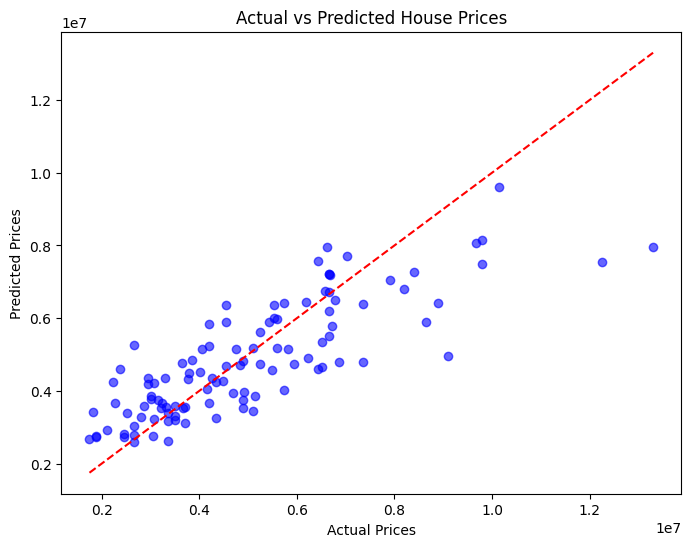

In [21]:
# 10. Visualization: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.show()



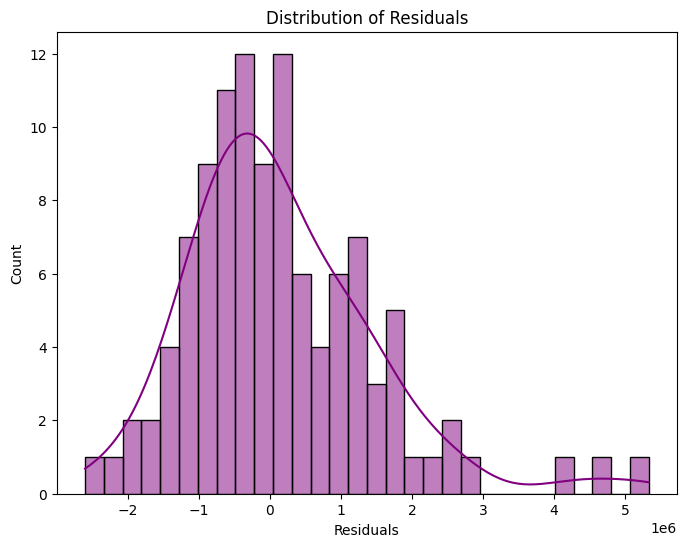

In [22]:
# 11. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()